In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
plik_rsel = pd.read_csv('rsel.csv')
plik_cel = pd.read_csv('cel.csv')
plik_cel_rs = pd.read_csv('cel-rs.csv')
plik_2cel = pd.read_csv('2cel.csv')
plik_2cel_rs = pd.read_csv('2cel-rs.csv')

files = [ plik_rsel, plik_cel_rs, plik_2cel_rs, plik_cel, plik_2cel ]
labels = [ "1-Evol-RS", "1-Coev-RS","2-Coev-RS", "1-Coev",  "2-Coev" ]

In [117]:
def count_avg(source):
    source_transp = source.transpose()
    return np.mean(source_transp[2:], axis=0)

In [148]:
def draw_plot(source, label):
    ax_b.plot(source['effort']/1000, count_avg(source)*100, label=label)
    ax_b.legend()

In [149]:
def draw_plot2():
    tab = []
    for file in files:
        source_transp = file.transpose()
        tab.append(source_transp[199][2:].transpose()*100)
    meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='firebrick')
    bp = plt.boxplot(tab, sym=' ', showmeans=True, meanprops=meanpointprops, labels=labels, notch=1, whiskerprops=dict(linestyle='--'));
    plt.xticks(rotation=45)
    
    for box in bp['boxes']:
    # change outline color
        box.set( color='#7570b3', linewidth=2)
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2 )

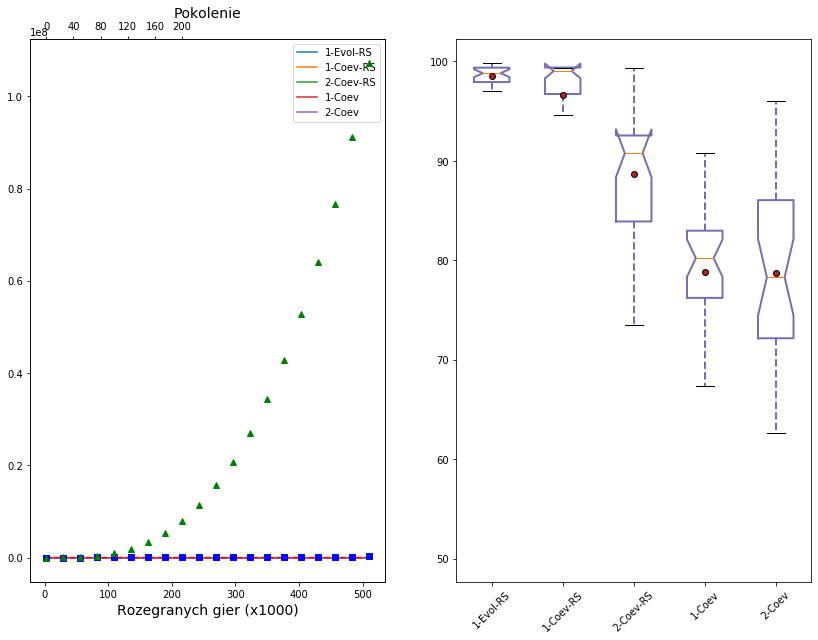

In [152]:
are = plt.figure(figsize=(14,10))
ax_b = are.add_subplot(121)
ax_t = ax_b.twiny()
ax_b.set_xlabel("Rozegranych gier (x1000)", fontsize=14)
ax_t.set_xlabel("Pokolenie", fontsize=14)
plt.ylabel("Odsetek wygranych gier[%]", fontsize=14)
for file, label in zip(files, labels):
    draw_plot(file, label)
#ax_t.set_xlim(ax_b.get_xlim())
t = np.arange(0., 500., 25.)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
ax_t.set_xticks(plik_2cel['generation'])
plt.xticks(np.arange(0,201,40))
p2 = are.add_subplot(122)
draw_plot2()

,generation,effort,run-9,run-50,run-6,run-51,run-40,run-49,run-12,run-1,...,run-0,run-59,run-11,run-24,run-5,run-23,run-35,run-3,run-17,run-37
0,0,2500,0.5069,0.6827,0.6184,0.6842,0.6036,0.6498,0.6292,0.6789,...,0.6479,0.6119,0.6295,0.5852,0.5645,0.6456,0.6237,0.7109,0.7182,0.6407
